In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
### Fig 2:
def file_reader(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['N_ls']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0

In [21]:
repeat = 25
Nl = 5
f2 = "pauli/7q_loss/" + "even_Nl_%d" % (Nl)
succ_prob, p_list, Ntot = file_reader(f2,repeat)

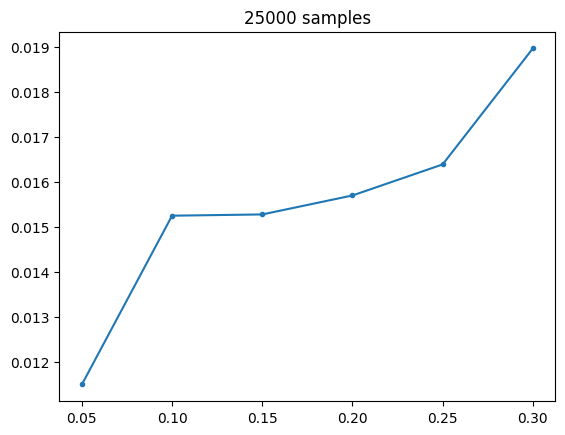

In [24]:
plt.plot(p_list, 1-succ_prob,'.-')
plt.title('25000 samples')
plt.savefig("logicalerror.pdf")